#### Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [4]:
# Install TensorFlow and Keras
!pip install tensorflow
!pip install keras

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

# Print the versions
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.14.0


AttributeError: module 'keras.api._v2.keras' has no attribute '__version__'

#### Q2. Load the Wine Quality dataset and explore its dimensions.
Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

#### Q3. Check for null values, identify categorical variables, and encode them.

#### Q4. Separate the features and target variables from the dataframe.

#### Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

#### Q6. Perform scaling on the dataset.

#### Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

#### Q8. Create a Sequential model and add all the layers to it.

#### Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

#### Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.

#### Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.

#### Q12. Print the model summary.

#### Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

#### Q14. Compile the model with the specified loss function, optimizer, and metrics.

#### Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.

#### Q16. Get the model's parameters.

#### Q17. Store the model's training history as a Pandas DataFrame.

#### Q18. Plot the model's training history.

#### Q19. Evaluate the model's performance using the test data.

In [121]:
# Load necessary libraries and modules
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
import datetime
import matplotlib.pyplot as plt


In [122]:
# Load and explore the dataset
wine_data = pd.read_csv("wine.csv")
print("Dimensions of the dataset:", wine_data.shape)
print("Null values in the dataset:")
print(wine_data.isnull().sum())


Dimensions of the dataset: (1599, 12)
Null values in the dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [125]:
# Identify categorical variables and encode them
categorical_cols = wine_data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    wine_data[col] = le.fit_transform(wine_data[col])
    label_encoders[col] = le

    # Separate features and target variables
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']


In [126]:
# Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [127]:
# Create a Sequential model with hidden layers
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [129]:
# Create callbacks
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint_callback = ModelCheckpoint(filepath="best_model.h5", monitor='val_accuracy', save_best_only=True)

# Print model summary
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                768       
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [130]:
# Fit the model with callbacks
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[tensorboard_callback, early_stopping_callback, model_checkpoint_callback]
)

# Get model parameters
model_params = model.count_params()

# Store model training history as a Pandas DataFrame
history_df = pd.DataFrame(history.history)


Epoch 1/100
40/40 [==============================] - 1s 9ms/step - loss: 0.6573 - accuracy: 0.5911 - val_loss: 0.5732 - val_accuracy: 0.6812
Epoch 2/100
21/40 [==============>...............] - ETA: 0s - loss: 0.5745 - accuracy: 0.7054

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40/40 [==============================] - 0s 5ms/step - loss: 0.5496 - accuracy: 0.7185 - val_loss: 0.5565 - val_accuracy: 0.6938
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 0.5257 - accuracy: 0.7342 - val_loss: 0.5434 - val_accuracy: 0.7125
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.5133 - accuracy: 0.7420 - val_loss: 0.5463 - val_accuracy: 0.7000
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 0.5051 - accuracy: 0.7522 - val_loss: 0.5461 - val_accuracy: 0.6938
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.4979 - accuracy: 0.7498 - val_loss: 0.5461 - val_accuracy: 0.6938
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.4908 - accuracy: 0.7537 - val_loss: 0.5399 - val_accuracy: 0.7063
Epoch 8/100
40/40 [==============================] - 0s 5ms/step - loss: 0.4879 - accuracy: 0.7654 - val_loss: 0.5321 - val_accuracy: 0.7188
Epoch 9/100
40/40 [======

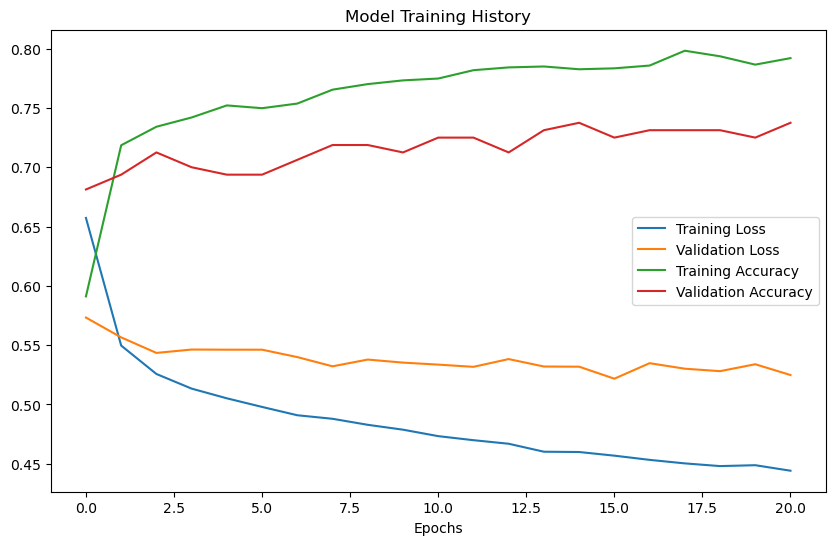

In [131]:
# Plot the model's training history
plt.figure(figsize=(10, 6))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.show()


In [133]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

5/5 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.7500
Test accuracy: 75.00%
